# Simulation of a convolutional encoder and decoder

In this example we will show how to use the convolutional encoder/decoder class in py-itpp. The Viterbi decoder uses the soft received values. Original C++ version of this example is available at http://itpp.sourceforge.net/4.3.1/convcode.html.

In [2]:
# Imports
import py_itpp as pyp
from matplotlib import pyplot as plt

#  Set up the convolutional encoder/decoder class:
In this example we will simulate a rate 1/3 code that is listed in J. G. Proakis, "Digital communications". The encoder has constraint length 7.

In [3]:
conv_code = pyp.convcode.Convolutional_Code()

generators = pyp.vec.ivec(3)
generators[0] = 91  # Octal 0133
generators[1] = 101 # Octal 0145
generators[2] = 125 # Octal 0175
constraint_length = 7
conv_code.set_generator_polynomials(generators, constraint_length)

# Initialize modulator, channel, and error counter

In [4]:
# Initialize BPSK modulator
bpsk = pyp.modulator.BPSK()

# Initialize an AWGN channel
channel = pyp.channel.AWGN_Channel(noisevar=0)

# Initialize bit error counter
berc = pyp.error_counters.BERC(indelay=0, inignorefirst=0, inignorelast=0)

# Set up some simulation specific parameters

In [8]:
EbN0_dB = pyp.vec.vec('-5:0.5:5')
EbN0 = pyp.log_exp.inv_dB(EbN0_dB)

energy_per_bit = 1.0 / conv_code.get_rate()
noise_variance = energy_per_bit * pyp.log_exp.pow(EbN0_dB, -1.0)

nrof_bits = 10000 # Number of bits
max_errors = 100
max_iterations = 10

ber = pyp.vec.vec(EbN0_dB.length()) # Bit error rate
ber.clear()

# Randomize the random number generators
pyp.random.RNG_reset(42)

# Run the simulation

In [9]:
transmitted_symbols = pyp.vec.vec()
for p in range(EbN0_dB.length()):
    print('Now simulating point %d out of %d with EbN0_dB = %.2f'%(p + 1, EbN0_dB.length(), EbN0_dB[p]))
    berc.clear()  # Clear the bit error rate counter.
    channel.set_noise(noise_variance[p] / 2.0);  # Set the noise value of the AWGN channel.
    for i in range(max_iterations):
      uncoded_bits = pyp.random.randb(nrof_bits)            #The uncoded bits.
      coded_bits = conv_code.encode(uncoded_bits)           # The convolutional encoder function.
      bpsk.modulate_bits(coded_bits, transmitted_symbols)   # The BPSK modulator.
      received_symbols = channel(transmitted_symbols)       # The AWGN channel.
      decoded_bits = conv_code.decode(received_symbols)     # The Viterbi decoder function.
      berc.count(uncoded_bits, decoded_bits)                # Count the errors.
          
      ber[p] = berc.get_errorrate()
      
      # Break the simulation on this point if sufficient number of bit errors were observed
      if (berc.get_errors() > max_errors):
#        print('Breaking on point %d with %d errors'%(p + 1, berc.get_errors()))
        break

Now simulating point 1 out of 21 with EbN0_dB = -5.00
Now simulating point 2 out of 21 with EbN0_dB = -4.50
Now simulating point 3 out of 21 with EbN0_dB = -4.00
Now simulating point 4 out of 21 with EbN0_dB = -3.50
Now simulating point 5 out of 21 with EbN0_dB = -3.00
Now simulating point 6 out of 21 with EbN0_dB = -2.50
Now simulating point 7 out of 21 with EbN0_dB = -2.00
Now simulating point 8 out of 21 with EbN0_dB = -1.50
Now simulating point 9 out of 21 with EbN0_dB = -1.00
Now simulating point 10 out of 21 with EbN0_dB = -0.50
Now simulating point 11 out of 21 with EbN0_dB = 0.00
Now simulating point 12 out of 21 with EbN0_dB = 0.50
Now simulating point 13 out of 21 with EbN0_dB = 1.00
Now simulating point 14 out of 21 with EbN0_dB = 1.50
Now simulating point 15 out of 21 with EbN0_dB = 2.00
Now simulating point 16 out of 21 with EbN0_dB = 2.50
Now simulating point 17 out of 21 with EbN0_dB = 3.00
Now simulating point 18 out of 21 with EbN0_dB = 3.50
Now simulating point 19 out

# Plot results

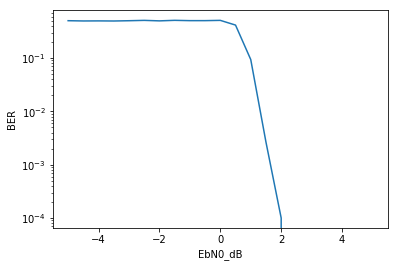

In [11]:
# print(ber)
# print(EbN0_dB)

#Plot the results:
plt.figure()
plt.semilogy(EbN0_dB.to_numpy_ndarray(), ber.to_numpy_ndarray())
plt.xlabel('EbN0_dB')
plt.ylabel('BER')
plt.show()